In [10]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from fractions import gcd
import matplotlib.colors as colors
#import plotly.express as px
#import plotly.graph_objects as go

import pickle

#import seaborn as sns
import datetime
import time

In [2]:
###LOAD RESULTS OF PREVIOUS COMPUTATIONS

In [14]:
filehandler=open('HittingTimeLevyDifferentSizeTargetShapeCutOffProbaDetect.obj','rb')
TimesLevyProbaDetect=pickle.load(filehandler)
filehandler.close()

In [6]:
### MODEL FUNCTIONS

In [26]:
#Basic Parameters
rangemu_LevyDistrib=[round(1+0.1*i,2) for i in range(21)]

##Targets sizes
def rangeD_geom(n):
    L=[0]; i=1
    while i<np.sqrt(n): 
        L.append(i); i*=2;
    return L

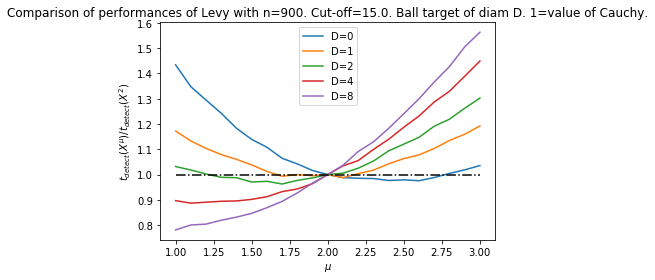

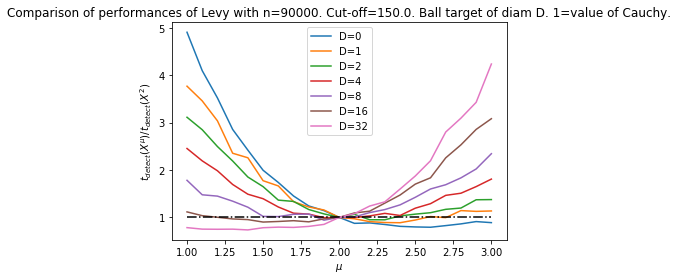

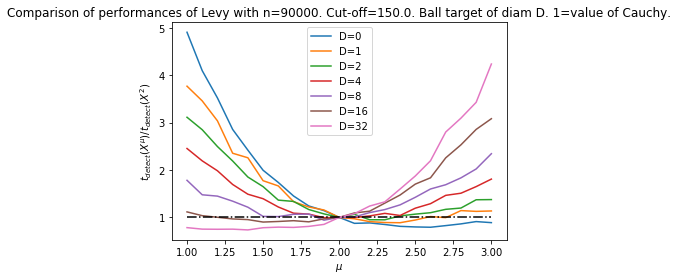

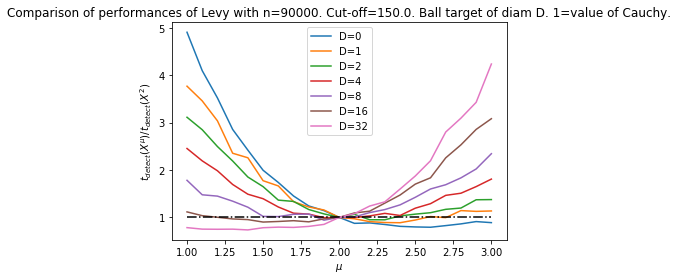

In [36]:
#Computation of overruns of different Levy walks -- figure 3 of the paper
#Overrun for n=900, p=0

p=0
for TargetShape in ['Ball']:
    plt.figure()
    RatioPerfOpt=dict()
    rangeD=[0,1,2,4,8]
    for n in [30*30]:
        lmax=int(np.sqrt(n))/2
        for mu in rangemu_LevyDistrib:
            m=0
            for D in rangeD:
                RatioPerfOpt[(n,TargetShape,mu,lmax,D)]=np.average(TimesLevyProbaDetect[(n,mu,lmax,D,TargetShape,p)])*(D+1)/float(n)

        for D in rangeD:
            Overrun=dict()
            for mu in rangemu_LevyDistrib:
                Overrun[mu]=RatioPerfOpt[(n,TargetShape,mu,lmax,D)]/float(RatioPerfOpt[(n,TargetShape,2.0,lmax,D)])

            plt.plot(rangemu_LevyDistrib,[Overrun[mu] for mu in rangemu_LevyDistrib],'-', label='D=%s'%D)

        plt.plot([1.0,3.0],[1,1], '-.k')
        plt.legend()

        plt.title('Comparison of performances of Levy with n=%s. Cut-off=%s. '%(n,lmax)+TargetShape+' target of diam D. 1=value of Cauchy.')
        plt.xlabel('$\mu$')
        plt.ylabel('$t_{detect}(X^{\mu}) / t_{detect}(X^2) $')
        plt.show()
        
#Overrun for n=300*300 and p=0, p=0.1, p=1:

for p in [0,0.1,1]:
    for TargetShape in ['Ball']:
        plt.figure()
        RatioPerfOpt=dict()
        for n in [300*300]:
            rangeD=[0,1,2,4,8,16,32]
            lmax=int(np.sqrt(n))/2
            for mu in rangemu_LevyDistrib:
                m=0
                for D in rangeD:
                    RatioPerfOpt[(n,TargetShape,mu,lmax,D)]=np.average(TimesLevyProbaDetect[(n,mu,lmax,D,TargetShape,0)])*(D+1)/float(n)

            for D in rangeD:
                Overrun=dict()
                for mu in rangemu_LevyDistrib:
                    Overrun[mu]=RatioPerfOpt[(n,TargetShape,mu,lmax,D)]/float(RatioPerfOpt[(n,TargetShape,2.0,lmax,D)])

                plt.plot(rangemu_LevyDistrib,[Overrun[mu] for mu in rangemu_LevyDistrib],'-', label='D=%s'%D)

            plt.legend()
            plt.plot([1.0,3.0],[1,1], '-.k')
            plt.title('Comparison of performances of Levy with n=%s. Cut-off=%s. '%(n,lmax)+TargetShape+' target of diam D. 1=value of Cauchy.')
            plt.xlabel('$\mu$')
            plt.ylabel('$t_{detect}(X^{\mu}) / t_{detect}(X^2) $')

            plt.show()

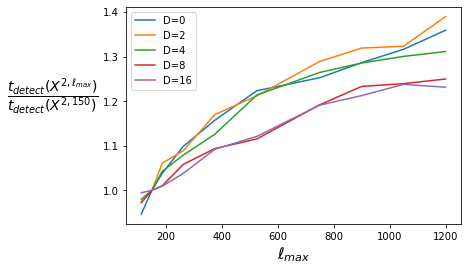

In [50]:
###DEPENDENCY ON THE CUT-OFF FOR THE CAUCHY WALK (figure 4 of the paper)

n=300**2
sqrt_n=int(np.sqrt(n))
l_medium=int(0.5*sqrt_n)


range_lmax=[112,150,
 187,
 262,
 375,
 525,
 750,
 900,
 1050,
 1200];
mu=2.0

for TargetShape in ['Ball']:
    plt.figure()
    RatioPerfOpt=dict()
    StdRatioPerfOpt=dict()
    rangeD=[0,2,4,8,16]

    for lmax in range_lmax:
        m=0
        for D in rangeD:
            RatioPerfOpt[(n,TargetShape,mu,lmax,D)]=np.average(TimesLevyProbaDetect[(n,mu,lmax,D,TargetShape,0)])*(D+1)/float(n)
            
    for D in rangeD:
        SensitivityRatio=[]
        StdSensitivityRatio=[]
        for lmax in range_lmax:
            SensitivityRatio.append(RatioPerfOpt[(n,TargetShape,mu,lmax,D)]/RatioPerfOpt[(n,TargetShape,mu,sqrt_n/2,D)])            
        
        plt.figure(1)
        plt.plot(range_lmax,SensitivityRatio,'-', label='D=%s'%D)

        #plt.plot([1.0,3.0],[1,1], '-.k')
plt.legend()

        #plt.title('Comparison of performances of Cauchy with cut-off $l_{max}$. n=%s '%(n)+TargetShape+' target of diam D.')
plt.xlabel('$\ell_{max}$',fontsize=16)

plt.ylabel('$\dfrac{t_{detect}(X^{2,\ell_{max}})}{t_{detect}(X^{2,150})}$',labelpad=50,fontsize=14,rotation=0)#/Comp(X^{2,\sqrt{n}/2})$')
plt.savefig('CauchyPerf_Truncated_n300x300_p0v2.pdf',bbox_inches = 'tight')

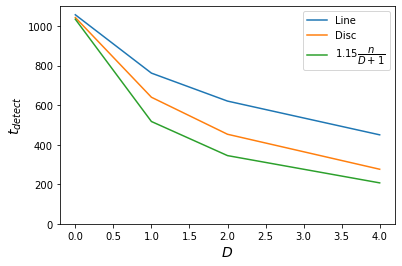

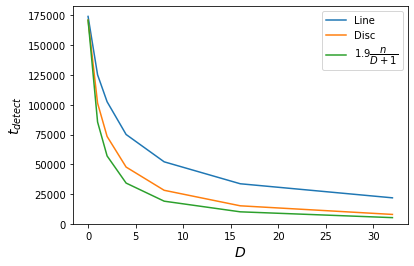

In [49]:
###DEPENDENCY ON THE SHAPE OF THE TARGET FOR THE CAUCHY WALK (figure 2 of the paper)

#n=30*30

n=30**2
sqrt_n=int(np.sqrt(n))
lmax=sqrt_n/2
mu=2.0

#Then you compute the Scale-Sensitivity for each mu
for TargetShape in ['Line','Ball']:
    RatioPerfOpt=dict()
    rangeD=[0,1,2,4]


    m=0
    for D in rangeD:
        RatioPerfOpt[(n,TargetShape,mu,lmax,D)]=np.average(TimesLevyProbaDetect[(n,mu,lmax,D,TargetShape,0)])#*(D+1)/float(n)
    SensitivityRatio=dict()
    LowerBound=dict()
    for D in rangeD:
        SensitivityRatio[D]=RatioPerfOpt[(n,TargetShape,mu,lmax,D)]

        #if D==0:
        #    LowerBound[D]=2*n
        #elif D==1:
        #    LowerBound[D]=n
        #else:
        #    LowerBound[D]=n/float(D)*(1+np.log(D))
        LowerBound[D]=1.15*n/float(D+1)
        
    if TargetShape=='Line':
        plt.plot(rangeD,[SensitivityRatio[D] for D in rangeD],'-',label='%s'%TargetShape)
    
    if TargetShape=='Ball':
        plt.plot(rangeD,[SensitivityRatio[D] for D in rangeD],'-',label='Disc')

plt.plot(rangeD,[LowerBound[D] for D in rangeD], '-', label='$1.15 \dfrac{n}{D+1}$')
    #plt.plot([1.0,3.0],[1,1], '-.k')
plt.ylim(bottom=0)
#plt.title('Cauchy Competitivity')
plt.xlabel('$D$',fontsize=14)
plt.ylabel('$t_{detect}$',fontsize=14)
plt.legend()
plt.savefig('CauchyPerf_n30x30_p0.pdf', bbox_inches='tight')

#n=300*300
plt.figure()
n=300**2
sqrt_n=int(np.sqrt(n))
lmax=sqrt_n/2
mu=2.0

#Then you compute the Scale-Sensitivity for each mu
for TargetShape in ['Line','Ball']:
    RatioPerfOpt=dict()
    rangeD=[0,1,2,4,8,16,32]


    m=0
    for D in rangeD:
        RatioPerfOpt[(n,TargetShape,mu,lmax,D)]=np.average(TimesLevyProbaDetect[(n,mu,lmax,D,TargetShape,0)])#*(D+1)/float(n)
    SensitivityRatio=dict()
    LowerBound=dict()
    for D in rangeD:
        SensitivityRatio[D]=RatioPerfOpt[(n,TargetShape,mu,lmax,D)]

        #if D==0:
        #    LowerBound[D]=2*n
        #elif D==1:
        #    LowerBound[D]=n
        #else:
        #    LowerBound[D]=n/float(D)*(1+np.log(D))
        LowerBound[D]=1.9*n/float(D+1)
    if TargetShape=='Line':
        plt.plot(rangeD,[SensitivityRatio[D] for D in rangeD],'-',label='%s'%TargetShape)
    
        
    if TargetShape=='Ball':
        plt.plot(rangeD,[SensitivityRatio[D] for D in rangeD],'-',label='Disc')

plt.plot(rangeD,[LowerBound[D] for D in rangeD], '-', label='$1.9 \dfrac{n}{D+1}$')
    #plt.plot([1.0,3.0],[1,1], '-.k')
plt.ylim(bottom=0)
#plt.title('Cauchy Competitivity')
plt.xlabel('$D$',fontsize=14)
plt.ylabel('$t_{detect}$',fontsize=14)
plt.legend()
plt.savefig('CauchyPerf_n300x300_p0.pdf', bbox_inches='tight')